Importação de módulos

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Importação dos dados do Excel

In [9]:
series = pd.read_excel('roberto.xlsx', index_col=0)

Obtenção dos log-retornos

In [11]:
series['retIBOV'] = np.log(series['IBOV']).diff()
series['retITUB4'] = np.log(series['ITUB4']).diff()
series['retVALE3'] = np.log(series['VALE3']).diff()
series

,IBOV,ITUB4,VALE3,retIBOV,retITUB4,retVALE3
Data,,,,,,
2021-01-04,118854,30.90,91.46,NaN,NaN,NaN
2021-01-05,119376,30.70,93.00,0.004382,-0.006494,0.016698
2021-01-06,119100,31.55,95.61,-0.002315,0.027311,0.027678
2021-01-07,122385,32.83,102.32,0.027208,0.039769,0.067828
2021-01-08,125076,32.82,102.00,0.021750,-0.000305,-0.003132
...,...,...,...,...,...,...
2021-12-23,104891,21.34,79.15,-0.003350,0.005168,-0.009681
2021-12-27,105554,21.56,78.95,0.006301,0.010257,-0.002530
2021-12-28,104864,21.48,76.80,-0.006558,-0.003717,-0.027610


Quantis

In [12]:
print(series['retITUB4'].quantile([.25, .5, .75]))
print(series['retVALE3'].quantile([.25, .5, .75]))

0.25   -0.012366
0.50   -0.002117
0.75    0.011699
Name: retITUB4, dtype: float64
0.25   -0.015259
0.50   -0.000607
0.75    0.012421
Name: retVALE3, dtype: float64


Boxplot

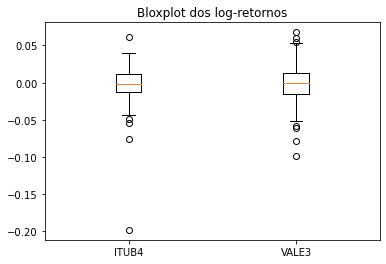

In [13]:
colunas = [series['retITUB4'].dropna(), series['retVALE3'].dropna()]
fig, ax = plt.subplots()
ax.boxplot(colunas)
ax.set_title('Bloxplot dos log-retornos')
plt.xticks([1, 2], ["ITUB4", "VALE3"])
plt.show()

75 retornos mais recentes

In [14]:
Series_Recentes = series.tail(75)
Series_Recentes

,IBOV,ITUB4,VALE3,retIBOV,retITUB4,retVALE3
Data,,,,,,
2021-09-13,116403,29.17,94.76,0.018363,0.012418,-0.000528
2021-09-14,116180,28.99,94.09,-0.001918,-0.006190,-0.007096
2021-09-15,115062,28.52,91.74,-0.009670,-0.016345,-0.025293
2021-09-16,113794,28.50,87.93,-0.011081,-0.000702,-0.042417
2021-09-17,111439,27.82,86.15,-0.020912,-0.024149,-0.020451
...,...,...,...,...,...,...
2021-12-23,104891,21.34,79.15,-0.003350,0.005168,-0.009681
2021-12-27,105554,21.56,78.95,0.006301,0.010257,-0.002530
2021-12-28,104864,21.48,76.80,-0.006558,-0.003717,-0.027610


Tabela com várias estatísticas

In [24]:
MediaITUB4 = st.mean(Series_Recentes['retITUB4'])
MediaVALE3 = st.mean(Series_Recentes['retVALE3'])
MedianaITUB4 = st.median(Series_Recentes['retITUB4'])
MedianaVALE3 = st.median(Series_Recentes['retVALE3'])
DevPadITUB4 = st.stdev(Series_Recentes['retITUB4'])
DevPadVALE3 = st.stdev(Series_Recentes['retVALE3'])
AssimITUB4 = scipy.stats.skew(Series_Recentes['retITUB4'])
AssimVALE3 = scipy.stats.skew(Series_Recentes['retVALE3'])
CoefCurtoseITUB4 = scipy.stats.kurtosis(Series_Recentes['retITUB4'])
CoefCurtoseVALE3 = scipy.stats.kurtosis(Series_Recentes['retVALE3'])
CorrITUB4 = scipy.stats.pearsonr(Series_Recentes['retITUB4'], Series_Recentes['retIBOV'])[0]
CorrVALE3 = scipy.stats.pearsonr(Series_Recentes['retVALE3'], Series_Recentes['retIBOV'])[0]

tabela_sumario = {'Média': [MediaITUB4,MediaVALE3],
		'Mediana': [MedianaITUB4, MedianaVALE3], 
		'Desvio-Padrão': [DevPadITUB4, DevPadVALE3],
		'Assimetria': [AssimITUB4,AssimVALE3],
		'Curtose': [CoefCurtoseITUB4, CoefCurtoseVALE3],
		'Correlação': [CorrITUB4, CorrVALE3]}
	
tabela_sumario = pd.DataFrame(tabela_sumario, index =['ITUB4','VALE3'])
tabela_sumario

,Média,Mediana,Desvio-Padrão,Assimetria,Curtose,Correlação
ITUB4,-0.004248,-0.003219,0.028934,-3.971086,25.028772,0.564876
VALE3,-0.002609,-0.003799,0.027447,-0.501681,1.439913,0.362405


Regressão Linear IBOV x ITUB4

In [65]:
x = Series_Recentes[['retITUB4']].dropna()
y = Series_Recentes[['retIBOV']].dropna()
reg = LinearRegression().fit(x, y)
print("Coefficients: \n", reg.intercept_, reg.coef_)

Coefficients: 
 [4.39247882e-05] [[0.28164014]]


Regressão Linear IBOV x VALE3

In [60]:
x = Series_Recentes[['retVALE3']].dropna()
y = Series_Recentes[['retIBOV']].dropna()
reg = LinearRegression().fit(x, y)
print("Coefficients: \n", reg.intercept_, reg.coef_)

Coefficients: 
 [-0.00065545] [[0.19047827]]
